<a href="https://colab.research.google.com/github/Saikumarerothu/CVIP-DataScience/blob/main/CVIP_Task_3_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



Email Spam Detection.
The goal of this project is to develop a robust email spam detection system using machine
learning techniques. By analyzing the content and characteristics of emails, the system should
be able to accurately classify incoming emails as either spam or legitimate (ham).



In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Load your dataset
df = pd.read_csv('/content/spam.csv', encoding='latin1')


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['v2'], df['v1'], test_size=0.2, random_state=42)

# Convert the text data into numerical features using CountVectorizer
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Initialize a Naive Bayes classifier
classifier = MultinomialNB()

# Train the classifier
classifier.fit(X_train, y_train)

# Make predictions on the test set
predictions = classifier.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

# Print a classification report
print(classification_report(y_test, predictions))


Accuracy: 0.9838565022421525
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.99      0.89      0.94       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



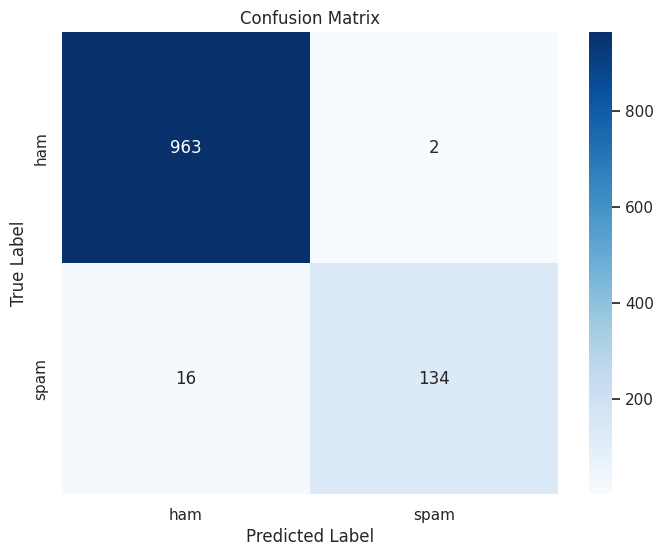

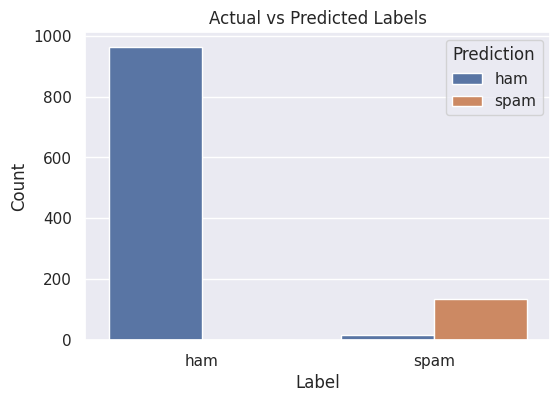

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot bar chart for actual vs predicted labels
plt.figure(figsize=(6, 4))
sns.countplot(x=y_test, hue=predictions)
plt.title('Actual vs Predicted Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.legend(title='Prediction')
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')